In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('malaria_dataset.csv')
df

,Fever,Headache,Chills,Fatigue,Severity,Gender,Age,Weight,Location
0,1,0,1,0,Moderate,Female,30,67,Urban
1,0,1,0,0,Mild,Female,24,23,Urban
2,0,1,0,0,Mild,Male,25,42,Rural
3,0,0,1,1,Moderate,Female,50,22,Rural
4,1,1,1,0,Moderate,Female,59,87,Urban
...,...,...,...,...,...,...,...,...,...
29995,1,1,1,0,Moderate,Female,29,81,Urban
29996,1,1,1,0,Moderate,Female,35,65,Urban
29997,1,0,0,0,Mild,Male,14,95,Rural
29998,0,0,0,0,Mild,Male,8,78,Urban


In [3]:
df.shape

(30000, 9)

In [4]:
df.head()

,Fever,Headache,Chills,Fatigue,Severity,Gender,Age,Weight,Location
0,1,0,1,0,Moderate,Female,30,67,Urban
1,0,1,0,0,Mild,Female,24,23,Urban
2,0,1,0,0,Mild,Male,25,42,Rural
3,0,0,1,1,Moderate,Female,50,22,Rural
4,1,1,1,0,Moderate,Female,59,87,Urban


In [5]:
df.tail()   

,Fever,Headache,Chills,Fatigue,Severity,Gender,Age,Weight,Location
29995,1,1,1,0,Moderate,Female,29,81,Urban
29996,1,1,1,0,Moderate,Female,35,65,Urban
29997,1,0,0,0,Mild,Male,14,95,Rural
29998,0,0,0,0,Mild,Male,8,78,Urban
29999,1,0,1,1,Moderate,Male,20,29,Rural


In [6]:
df.isna().sum()

Fever       0
Headache    0
Chills      0
Fatigue     0
Severity    0
Gender      0
Age         0
Weight      0
Location    0
dtype: int64

In [7]:
df1=df['Fever'].value_counts()
df1

Fever
1    15008
0    14992
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21703c77e00>,
 [Text(-0.0009216311503593372, 1.0999996139072155, '1'),
  Text(0.0009215961852111075, -1.0999996139365102, '0')],
 [Text(-0.0005027079001960021, 0.5999997894039356, '50.03%'),
  Text(0.0005026888282969676, -0.5999997894199146, '49.97%')])

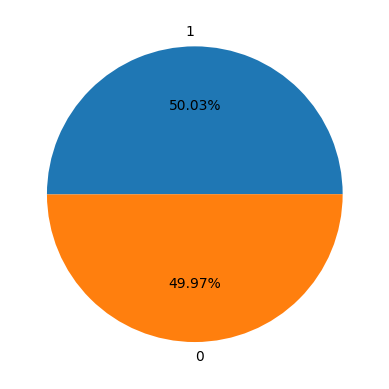

In [8]:
plt.pie(df1.values,labels=df1.index,autopct='%0.2f%%')

<BarContainer object of 2 artists>

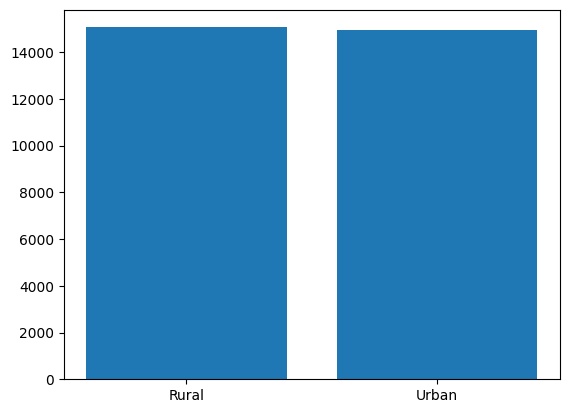

In [9]:
df3=df['Location'].value_counts()
plt.bar(df3.index,df3.values)

([<matplotlib.patches.Wedge at 0x217060c1950>,
 [Text(-0.00679622180846656, 1.0999790049674267, 'Male'),
  Text(0.0067967113548355555, -1.099979001942655, 'Female')],
 [Text(-0.0037070300773453958, 0.5999885481640509, '50.20%'),
  Text(0.003707297102637575, -0.5999885465141753, '49.80%')])

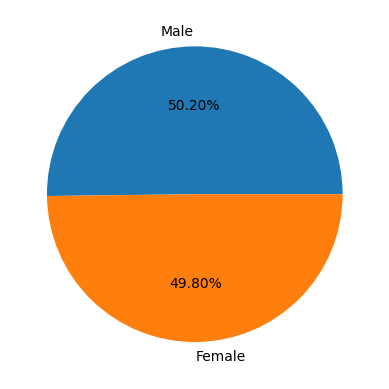

In [10]:
df4=df['Gender'].value_counts()
plt.pie(df4.values,labels=df4.index,autopct='%0.2f%%')

In [11]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [12]:
df['Severity']=lab.fit_transform(df['Severity'])
df['Severity']

0        1
1        0
2        0
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    1
Name: Severity, Length: 30000, dtype: int64

In [13]:
df['Gender']=lab.fit_transform(df['Gender'])
df['Gender']

0        0
1        0
2        1
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Gender, Length: 30000, dtype: int64

In [14]:
df['Location']=lab.fit_transform(df['Location'])
df['Location']

0        1
1        1
2        0
3        0
4        1
        ..
29995    1
29996    1
29997    0
29998    1
29999    0
Name: Location, Length: 30000, dtype: int64

In [15]:
df

,Fever,Headache,Chills,Fatigue,Severity,Gender,Age,Weight,Location
0,1,0,1,0,1,0,30,67,1
1,0,1,0,0,0,0,24,23,1
2,0,1,0,0,0,1,25,42,0
3,0,0,1,1,1,0,50,22,0
4,1,1,1,0,1,0,59,87,1
...,...,...,...,...,...,...,...,...,...
29995,1,1,1,0,1,0,29,81,1
29996,1,1,1,0,1,0,35,65,1
29997,1,0,0,0,0,1,14,95,0
29998,0,0,0,0,0,1,8,78,1


In [16]:
x=df.iloc[:,:-1].values
x

array([[ 1,  0,  1, ...,  0, 30, 67],
       [ 0,  1,  0, ...,  0, 24, 23],
       [ 0,  1,  0, ...,  1, 25, 42],
       ...,
       [ 1,  0,  0, ...,  1, 14, 95],
       [ 0,  0,  0, ...,  1,  8, 78],
       [ 1,  0,  1, ...,  1, 20, 29]], shape=(30000, 8))

In [17]:
y=df.iloc[:,-1].values
y

array([1, 1, 0, ..., 0, 1, 0], shape=(30000,))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train

array([[ 0,  1,  1, ...,  1, 17, 59],
       [ 0,  0,  0, ...,  0, 48, 84],
       [ 0,  1,  1, ...,  1, 60, 50],
       ...,
       [ 0,  0,  1, ...,  1, 69, 39],
       [ 0,  1,  0, ...,  0, 58, 51],
       [ 0,  1,  1, ...,  1,  7, 38]], shape=(21000, 8))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], shape=(9000,))

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [22]:
y_pred = naive_bayes.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

In [24]:
print("Confusion Matrix:\n", cm)
print("\nAccuracy Score:", score)

Confusion Matrix:
 [[2877 1630]
 [2778 1715]]

Accuracy Score: 0.5102222222222222


In [25]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.64      0.57      4507
           1       0.51      0.38      0.44      4493

    accuracy                           0.51      9000
   macro avg       0.51      0.51      0.50      9000
weighted avg       0.51      0.51      0.50      9000

